In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import discriminant_analysis
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
data_file = pd.read_csv("survey lung cancer.csv")
GENDER = "GENDER"
AGE = "AGE"
SMOKING = "SMOKING"
LUNG_CANCER = "LUNG_CANCER"
CHRONIC_DISEASE = "CHRONIC DISEASE"
data_df = pd.read_csv("survey lung cancer.csv")

for col in data_df.columns:
    if col != AGE:
        data_df[col] = data_df[col].astype('category').cat.codes
data_df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [3]:
data_df['LUNG_CANCER'].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [4]:
# Seperate the data into people without lung cancer and those with it
no_data = data_df[data_df[LUNG_CANCER] == 0]
yes_data = data_df[data_df[LUNG_CANCER] == 1]

In [5]:
from sklearn.utils import resample

In [6]:
data_majority = data_df[data_df.LUNG_CANCER==1]
data_minority = data_df[data_df.LUNG_CANCER==0]

data_minority_upresampled = resample(data_minority,
                                   replace=True,
                                   n_samples=269,
                                   random_state=4)

data = pd.concat([data_majority, data_minority_upresampled])
data['LUNG_CANCER'].value_counts()

1    270
0    269
Name: LUNG_CANCER, dtype: int64

In [7]:
#data_upsampled.to_csv('D:/upsampled.csv')

In [8]:
data.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.053034,0.013795,-0.101761,0.008924,-0.022488,-0.160542,-0.123299,0.152937,0.195022,0.487007,0.110961,-0.127003,0.106336,0.453347,0.113331
AGE,0.053034,1.000000,-0.067120,-0.039480,0.051928,0.125363,-0.035446,0.009101,-0.034332,0.138633,0.143110,0.191779,-0.033381,-0.004218,0.021997,0.166834
SMOKING,0.013795,-0.067120,1.000000,-0.072564,0.060021,-0.016181,-0.081117,0.039806,0.176385,-0.141425,0.006192,-0.160457,-0.009227,0.033272,0.116128,0.128004
YELLOW_FINGERS,-0.101761,-0.039480,-0.072564,1.000000,0.443188,0.152721,-0.071894,-0.293359,-0.106982,0.010794,-0.121288,0.154925,-0.146664,0.381276,0.014088,0.198507
ANXIETY,0.008924,0.051928,0.060021,0.443188,1.000000,0.122630,-0.044979,-0.218399,-0.126870,-0.236965,-0.012848,-0.139669,-0.373462,0.471913,-0.047375,0.158786
PEER_PRESSURE,-0.022488,0.125363,-0.016181,0.152721,0.122630,1.000000,0.143461,0.049814,0.022248,0.081947,0.049987,0.005754,-0.123383,0.268856,0.102634,0.311043
CHRONIC DISEASE,-0.160542,-0.035446,-0.081117,-0.071894,-0.044979,0.143461,1.000000,0.038425,0.216899,-0.053833,0.116194,-0.192224,0.066013,0.084499,-0.079913,0.244002
FATIGUE,-0.123299,0.009101,0.039806,-0.293359,-0.218399,0.049814,0.038425,1.000000,0.125596,0.153600,-0.100524,0.028123,0.491690,-0.119271,-0.032266,0.234971
ALLERGY,0.152937,-0.034332,0.176385,-0.106982,-0.126870,0.022248,0.216899,0.125596,1.000000,0.272138,0.420668,0.242412,0.060401,0.087579,0.300952,0.513200
WHEEZING,0.195022,0.138633,-0.141425,0.010794,-0.236965,0.081947,-0.053833,0.153600,0.272138,1.000000,0.353470,0.503504,0.188566,0.113846,0.257012,0.362466


<AxesSubplot:>

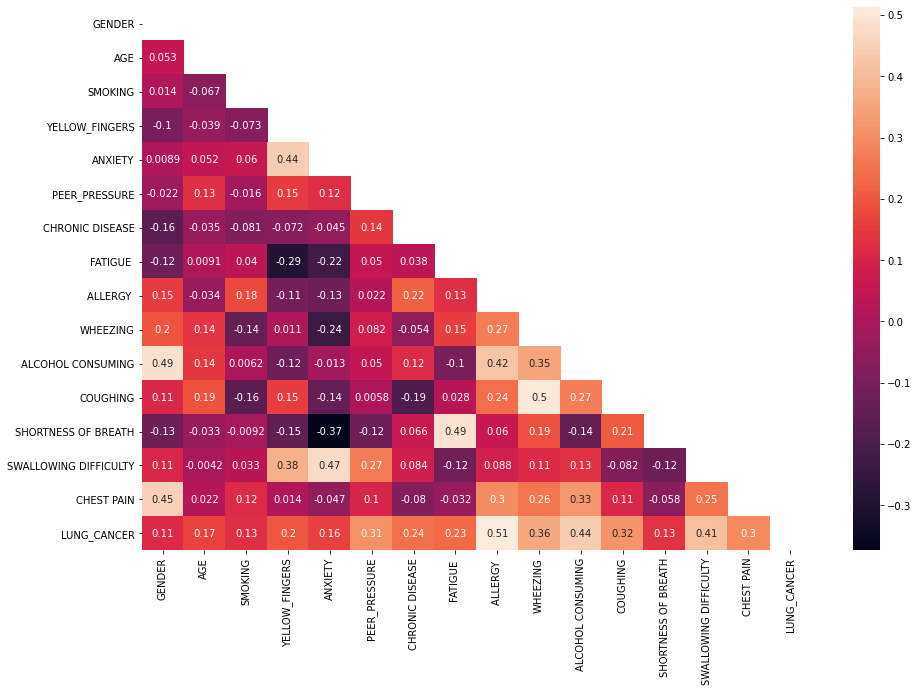

In [9]:
matrix = np.triu(data.corr())
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot=True, mask=matrix)

# Age

<AxesSubplot:title={'center':'Age vs. lung cancer'}, ylabel='Frequency'>

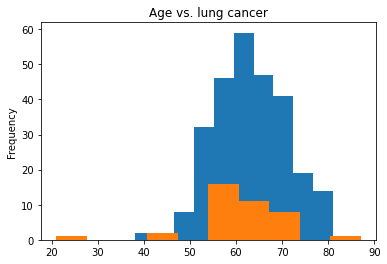

In [10]:
yes_data[AGE].plot(title="Age vs. lung cancer", kind="hist")
no_data[AGE].plot(kind="hist")

# Smoking

<AxesSubplot:title={'center':'Smoking vs. lung cancer'}>

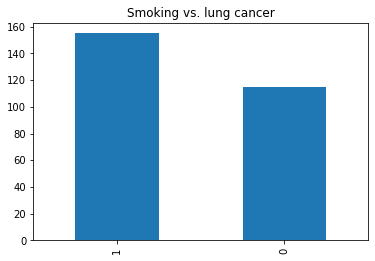

In [11]:
yes_data[SMOKING].value_counts().plot(title="Smoking vs. lung cancer", kind="bar")

<AxesSubplot:title={'center':'Non-smoking vs. lung cancer'}>

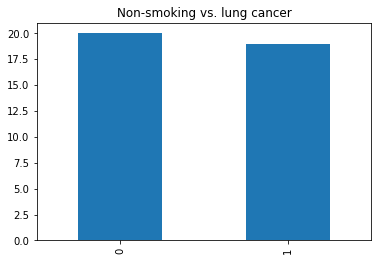

In [12]:
no_data[SMOKING].value_counts().plot(title="Non-smoking vs. lung cancer", kind="bar")

# Chronic Disease

<AxesSubplot:title={'center':'Chronic disease vs. lung cancer'}>

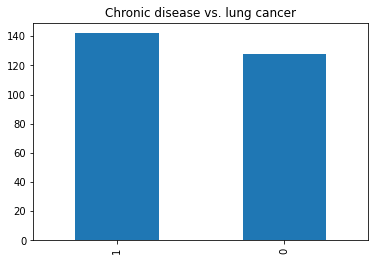

In [13]:
yes_data[CHRONIC_DISEASE].value_counts().plot(title="Chronic disease vs. lung cancer", kind="bar")

<AxesSubplot:title={'center':'Chronic disease vs. lung cancer'}>

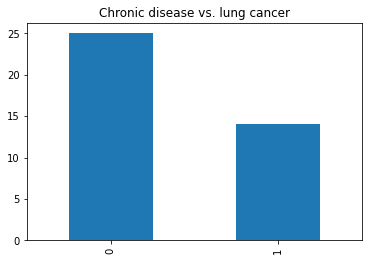

In [14]:
no_data[CHRONIC_DISEASE].value_counts().plot(title="Chronic disease vs. lung cancer", kind="bar")

# Making Predictions

In [15]:
# Seperate the data into training and validation set
data_X = data.iloc[:, 0:15]
# data_X = preprocessing.scale(data_X) 
# Scaling helps linearSVC converge
data_y = data.iloc[:, 15]
train_X, test_X, train_y, test_y = model_selection.train_test_split(
    data_X, data_y, test_size = 0.2, random_state=0)

In [16]:
def run_classifiers(classifiers, train_X, train_y, test_X, test_y):
    """
    Fits each classifier to the training data and runs it on the test data.
    Prints out the training and test accuracies.
    """
    results = [] # list of 3-tuples: (classifier name, train accuracy, test accuracy)
    
    for clf in classifiers:
        # Run classifier on train and test data
        clf.fit(train_X, train_y)
        train_pred = clf.predict(train_X)
        train_acc = metrics.accuracy_score(train_y, train_pred)

        test_pred = clf.predict(test_X)
        test_acc = metrics.accuracy_score(test_y, test_pred)
        
        # Print out misclassification metrics
        conf_mat = metrics.confusion_matrix(test_y, test_pred)
        precision = conf_mat[1][1] / (conf_mat[1][1] + conf_mat[0][1])
        recall = conf_mat[1][1] / (conf_mat[1][1] + conf_mat[1][0])
        f1_score = 2 * ((precision * recall) / (precision + recall))
        
        print(f"{type(clf).__name__}")
        print('-----------------------------')
        print(f"Precision rate = {precision}")
        print(f"Recall rate = {recall}")
        print("F1 score = {f1_score}\n")
        print(conf_mat)
        print('-----------------------------')
        
        # Store results
        results.append( ((type(clf).__name__), train_acc, test_acc))
        
        return results

In [17]:
classifiers = [
    discriminant_analysis.LinearDiscriminantAnalysis(),
    linear_model.LogisticRegression(solver="lbfgs", max_iter=200),
    ensemble.AdaBoostClassifier(),
    svm.SVC(C=1, gamma=1, kernel='rbf'),
    RandomForestClassifier(max_depth=5)
]
results = run_classifiers(classifiers, train_X, train_y, test_X, test_y)
results

LinearDiscriminantAnalysis
-----------------------------
Precision rate = 0.8846153846153846
Recall rate = 0.8679245283018868
F1 score = {f1_score}

[[49  6]
 [ 7 46]]
-----------------------------


[('LinearDiscriminantAnalysis', 0.9164733178654292, 0.8796296296296297)]

In [18]:
classifier_names = [clf[0] for clf in results]
train_acc = [clf[1] for clf in results]
test_acc = [clf[2] for clf in results]

for i in range(len(classifier_names)):
    print(classifier_names[i], train_acc[i])

LinearDiscriminantAnalysis 0.9164733178654292


In [19]:
Accuracy_df = pd.DataFrame(test_acc, classifier_names)
Accuracy_df.reset_index(inplace=True)

In [20]:
Accuracy_df
Accuracy_df.columns = ['Algorithm', 'Accuracy']
Accuracy_df

,Algorithm,Accuracy
0,LinearDiscriminantAnalysis,0.87963


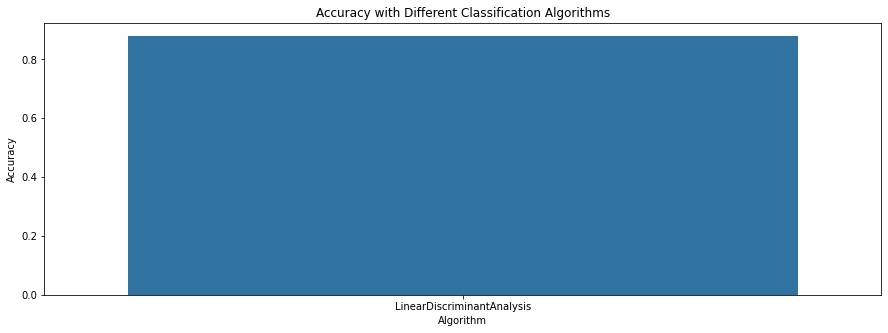

In [21]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Algorithm', y='Accuracy', data = Accuracy_df).set(title='Accuracy with Different Classification Algorithms')

In [22]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm.SVC(C=1, break_ties=False, cache_size=200,
                             class_weight=None, coef0=0.0,
                             decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
                             max_iter=-1,
                             probability=False, random_state=None, shrinking=True, tol=0.001,
                             verbose=False), train_X, train_y, cv=4, scoring="accuracy").mean())

0.986024575977847


# Parameters SVM

C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)

# fitting the model for grid search
grid.fit(train_X, train_y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.586 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.581 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.581 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.874 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.756 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.826 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.736 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.989 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.930 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.943 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.977 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.965 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [24]:
# print best parameter after tuning
print(grid.best_params_)

# print how the model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


# Construct Model

In [2]:
#from numpy import loadtxt
#data_file = loadtxt('survey lung cancer.csv', delimiter=',')
data_file = pd.read_csv("survey lung cancer.csv")
GENDER = "GENDER"
AGE = "AGE"
SMOKING = "SMOKING"
LUNG_CANCER = "LUNG_CANCER"
CHRONIC_DISEASE = "CHRONIC DISEASE"
data_df = pd.read_csv("survey lung cancer.csv")

for col in data_df.columns:
    if col != AGE:
        data_df[col] = data_df[col].astype('category').cat.codes
data_df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [3]:
# Load lung survey data, split train, val and test
from sklearn.model_selection import train_test_split

X = data_df.iloc[:, 0:15]
y = data_df.iloc[:, -1]

In [4]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2)

In [11]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import models
from tensorflow.python.keras.models import load_model

model = Sequential()
model.add(Dense(30, input_dim=15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                480       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [12]:
# train model: epoch, batch_size, validation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs=100, batch_size=15, validation_data=(X_val, y_val))

Epoch 1/100
14/14 [==============================] - 2s 29ms/step - loss: 9.4837 - accuracy: 0.1168 - val_loss: 4.8538 - val_accuracy: 0.1400
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 2.1586 - accuracy: 0.3096 - val_loss: 0.4442 - val_accuracy: 0.8600
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 0.4136 - accuracy: 0.8832 - val_loss: 0.6136 - val_accuracy: 0.8600
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.4486 - accuracy: 0.8832 - val_loss: 0.5532 - val_accuracy: 0.8600
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3811 - accuracy: 0.8832 - val_loss: 0.4559 - val_accuracy: 0.8600
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3689 - accuracy: 0.8832 - val_loss: 0.4403 - val_accuracy: 0.8600
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3657 - accuracy: 0.8832 - val_loss: 0.4477 - val_accuracy: 0.8600
Epoch 8/100


Epoch 59/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2324 - accuracy: 0.8832 - val_loss: 0.2925 - val_accuracy: 0.8600
Epoch 60/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2529 - accuracy: 0.8985 - val_loss: 0.2843 - val_accuracy: 0.8600
Epoch 61/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2335 - accuracy: 0.8934 - val_loss: 0.2949 - val_accuracy: 0.8600
Epoch 62/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2272 - accuracy: 0.9036 - val_loss: 0.2800 - val_accuracy: 0.8600
Epoch 63/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2282 - accuracy: 0.8883 - val_loss: 0.2866 - val_accuracy: 0.8600
Epoch 64/100
14/14 [==============================] - 0s 6ms/step - loss: 0.2276 - accuracy: 0.9086 - val_loss: 0.2783 - val_accuracy: 0.8600
Epoch 65/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2211 - accuracy: 0.8883 - val_loss: 0.3000 - val_accuracy: 0.8600
Epoch 

In [14]:
model.save("mymodel.h5")

In [15]:
model = load_model("mymodel.h5")

In [17]:
#validation
loss, acc = model.evaluate(X_test, y_test)
print("Loss = ", loss)
print("Acc = ", acc)

2/2 [==============================] - 0s 10ms/step - loss: 0.2057 - accuracy: 0.8871
Loss =  0.20565162599086761
Acc =  0.8870967626571655


In [28]:
model.predict(X_test)

array([[0.95875084],
       [0.76440704],
       [0.9648863 ],
       [0.9666197 ],
       [0.9980188 ],
       [0.97995836],
       [0.9018598 ],
       [0.417297  ],
       [0.9793102 ],
       [0.83457774],
       [0.996693  ],
       [0.9925252 ],
       [0.38699764],
       [0.9942001 ],
       [0.747028  ],
       [0.9570285 ],
       [0.6906784 ],
       [0.98276865],
       [0.95180553],
       [0.98615533],
       [0.9820784 ],
       [0.28103518],
       [0.9638043 ],
       [0.8919753 ],
       [0.9939934 ],
       [0.93977827],
       [0.36001626],
       [0.99443316],
       [0.96392846],
       [0.95864785],
       [0.40504575],
       [0.88565797],
       [0.9760494 ],
       [0.9725966 ],
       [0.9956    ],
       [0.39896402],
       [0.81649894],
       [0.9902538 ],
       [0.9702996 ],
       [0.8198447 ],
       [0.9879913 ],
       [0.9203054 ],
       [0.9763081 ],
       [0.9534427 ],
       [0.72804374],
       [0.9664688 ],
       [0.99548084],
       [0.975

In [33]:
v = np.array([[1,74,0,0,0,0,0,0,0,0,0,0,0,0,0]])
v.shape

(1, 15)

In [34]:
model.predict(v)

array([[0.08718869]], dtype=float32)

In [107]:
X_new = np.expand_dims(X_new, axis=0)

y_predict = model.predict(X_new)
result = "Presence of Lung Cancer (1)"
if y_predict <= 0.5:
    result = "Absence of Lung Cancer (0)"
print("Your lung cancer detection result: ", result)
print("The assigned number for the result: ", y_new)

KeyError: 10